# INSTALACION DE LIBRERIAS

In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install --extra-index-url https://pypi.nvidia.com cudf-cu12
!pip install cuml-cu12
!pip install faiss-cpu
!pip install hdbscan
!pip install torch
!pip install plotly
!pip install nbformat
!pip install ace-tools
!pip install category_encoders
!pip install imblearn
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of 

# IMPORTACIONES

In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score,classification_report, accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import gc
from imblearn.over_sampling import SMOTE,SMOTENC
import joblib
%load_ext cudf.pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rich.console import Console
from rich.panel import Panel
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# VARIABLES GLOBALES

In [ ]:
console = Console()

# FUNCIONES PARA EL PROYECTO

In [ ]:
def analizar_dataframe(df):
    # Mostrar primeras 15 filas
    console.print(Panel("Primeras 15 filas", title="🔍 Análisis de Datos 🔍", expand=False))
    display(df.head(15))

    # Información del DataFrame
    console.print(Panel("Info de la tabla", title="🔍 Análisis de Datos 🔍", expand=False))
    df_info = df.info()  # info() imprime directamente, no retorna un objeto

    # Validación de datos nulos
    console.print(Panel("Validación de existencia de datos null", title="🔍 Análisis de Datos 🔍", expand=False))
    display(df.isnull().sum())

    # Validación de datos duplicados
    console.print(Panel("Validación de datos duplicados", title="🔍 Análisis de Datos 🔍", expand=False))
    display(df[df.duplicated()])

    return df_info

# Funcion que imprime la cantidad de valores nulos (None o NaN), la cantidad de valores NaN
#    y los valores únicos de una columna específica de un DataFrame.
def check_nulls_and_unique_values(df, column_name):
    # Contar valores nulos (None y NaN)
    null_count = df[column_name].isnull().sum()

    # Contar valores NaN (isna() y isnull() funcionan igual para NaN)
    nan_count = df[column_name].isna().sum()

    # Obtener valores únicos de la columna
    unique_values = df[column_name].unique()

    # Mostrar resultados
    print(f"Valores nulos del campo '{column_name}' (None o NaN): {null_count}")
    print(f"Valores NaN del campo '{column_name}': {nan_count}")
    print(f"Valores únicos del campo '{column_name}': {unique_values}")

# Funcion para dividir el mes y año que tenga slash
def split_month_year_by_slash(df, source_col, month_col, year_col):
    # Dividir la columna en dos partes (mes y año)
    split_data = df[source_col].str.split('/', expand=True)

    # Asignar a las columnas nuevas
    df[month_col] = split_data[0].astype(int)
    df[year_col] = split_data[1].astype(int)

    return df

# Funcion para dividir en 2 columnas la hora y minuto
def split_hour_minute(df, col_to_split, new_hour_col, new_min_col):
    # Separar la columna en dos partes usando ':'
    df[new_hour_col] = df[col_to_split].str.split(':', expand=True)[0]
    df[new_min_col] = df[col_to_split].str.split(':', expand=True)[1]

    # Convertir a entero
    df[new_hour_col] = df[new_hour_col].astype(int)
    df[new_min_col] = df[new_min_col].astype(int)

    return df


# Función para limpiar valores nominales
def clean_nominal(value):
    if pd.isna(value):  # Manejar valores NaN
        return "desconocido"
    value = value.strip()  # Eliminar espacios extras
    value = value.lower()  # Convertir a minúsculas
    value = re.sub(r'[^a-zA-Z\s]', '', value)  # Eliminar caracteres especiales
    return value

# Metodo para limpiar el signo de dolar y convertir a float un monto
def clean_amount(amount):
    return float(amount.replace("$", ""))

# ANALISIS DE DATASET

## LECTURA CSV

In [ ]:
# Lee el archivo CSV de usuarios
user_csv_dataframe = pd.read_csv('sd254_users.csv')

# Lee el archivo CSV de tarjetas
card_csv_dataframe = pd.read_csv('sd254_cards.csv')

# Lee el archivo CSV de transacciones
transactions_csv_dataframe = pd.read_csv('credit_card_transactions-ibm_v2.csv')

### ANÁLISIS DE CSV DE USUARIOS

In [ ]:
analizar_dataframe(user_csv_dataframe)


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Primeras 15 filas         │
╰───────────────────────────╯

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,<NA>,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,<NA>,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,<NA>,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,<NA>,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,<NA>,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
5,Aldo Walker,42,70,1977,10,Male,58 Birch Lane,6,Davenport,IA,52803,41.55,-90.60,$20599,$41997,$0,704,3
6,Katalina Lewis,36,67,1983,12,Female,5695 Fifth Street,1,Louisville,KY,40299,38.22,-85.74,$25258,$51500,$102286,672,3
7,Ryland Howard,26,67,1993,12,Male,1941 Ninth Street,10,Portland,OR,97214,45.51,-122.64,$26790,$54623,$114711,728,1
8,Kenya Cooper,81,66,1938,7,Female,11 Spruce Avenue,<NA>,Telford,PA,18969,40.32,-75.32,$26273,$42509,$2895,755,5
9,Sawyer Butler,34,60,1986,1,Female,887 Grant Street,<NA>,Abbeville,LA,70510,29.97,-92.12,$18730,$38190,$81262,810,1


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Info de la tabla          │
╰───────────────────────────╯

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Person                       2000 non-null   object
 1   Current Age                  2000 non-null   int64
 2   Retirement Age               2000 non-null   int64
 3   Birth Year                   2000 non-null   int64
 4   Birth Month                  2000 non-null   int64
 5   Gender                       2000 non-null   object
 6   Address                      2000 non-null   object
 7   Apartment                    528 non-null    int64
 8   City                         2000 non-null   object
 9   State                        2000 non-null   object
 10  Zipcode                      2000 non-null   int64
 11  Latitude                     2000 non-null   float64
 12  Longitude                    2000 non-null   float64
 13  Per Capita Income - Zipcode  2000 non

╭─────── 🔍 Análisis de Datos 🔍 ────────╮
│ Validación de existencia de datos null │
╰────────────────────────────────────────╯

Person                            0
Current Age                       0
Retirement Age                    0
Birth Year                        0
Birth Month                       0
Gender                            0
Address                           0
Apartment                      1472
City                              0
State                             0
Zipcode                           0
Latitude                          0
Longitude                         0
Per Capita Income - Zipcode       0
Yearly Income - Person            0
Total Debt                        0
FICO Score                        0
Num Credit Cards                  0
dtype: int64

╭─── 🔍 Análisis de Datos 🔍 ────╮
│ Validación de datos duplicados │
╰────────────────────────────────╯

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards


En este caso, no existen datos duplicados, si existen datos nulos en la columna Apartment. Esta columna no es importante por lo que se la dejará de lado.

### ANÁLISIS DE CSV DE TARJETAS

In [ ]:
analizar_dataframe(card_csv_dataframe)

╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Primeras 15 filas         │
╰───────────────────────────╯

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
5,1,0,Visa,Credit,4404898874682993,09/2003,736,YES,1,$27500,09/2003,2012,No
6,1,1,Visa,Debit,4001482973848631,07/2022,972,YES,2,$28508,02/2011,2011,No
7,1,2,Mastercard,Debit,5627220683410948,06/2022,48,YES,2,$9022,07/2003,2015,No
8,1,3,Mastercard,Debit (Prepaid),5711382187309326,11/2020,722,YES,2,$54,06/2010,2015,No
9,1,4,Mastercard,Debit (Prepaid),5766121508358701,02/2023,908,YES,1,$99,07/2006,2012,No


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Info de la tabla          │
╰───────────────────────────╯

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   User                   6146 non-null   int64
 1   CARD INDEX             6146 non-null   int64
 2   Card Brand             6146 non-null   object
 3   Card Type              6146 non-null   object
 4   Card Number            6146 non-null   int64
 5   Expires                6146 non-null   object
 6   CVV                    6146 non-null   int64
 7   Has Chip               6146 non-null   object
 8   Cards Issued           6146 non-null   int64
 9   Credit Limit           6146 non-null   object
 10  Acct Open Date         6146 non-null   object
 11  Year PIN last Changed  6146 non-null   int64
 12  Card on Dark Web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 683.3+ KB


╭─────── 🔍 Análisis de Datos 🔍 ────────╮
│ Validación de existencia de datos null │
╰────────────────────────────────────────╯

User                     0
CARD INDEX               0
Card Brand               0
Card Type                0
Card Number              0
Expires                  0
CVV                      0
Has Chip                 0
Cards Issued             0
Credit Limit             0
Acct Open Date           0
Year PIN last Changed    0
Card on Dark Web         0
dtype: int64

╭─── 🔍 Análisis de Datos 🔍 ────╮
│ Validación de datos duplicados │
╰────────────────────────────────╯

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web


In [ ]:
repeated_valuess = card_csv_dataframe['Card Number'].value_counts()
repeated_valuess = repeated_valuess[repeated_valuess > 1]  # Filtrar los que están repetidos

print(repeated_valuess)

Series([], Name: count, dtype: int64)


En este caso no existen datos null ni duplicados

### ANÁLISIS DE CSV DE TRANSACCIONES

In [ ]:
analizar_dataframe(transactions_csv_dataframe)

╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Primeras 15 filas         │
╰───────────────────────────╯

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,<NA>,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,<NA>,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,<NA>,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,<NA>,No
6,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
7,0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
8,0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No
9,0,0,2002,9,5,09:35,$57.10,Swipe Transaction,4055257078481058705,La Verne,CA,91750.0,7538,<NA>,No


╭─ 🔍 Análisis de Datos 🔍 ─╮
│ Info de la tabla          │
╰───────────────────────────╯

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype
---  ------          -----
 0   User            int64
 1   Card            int64
 2   Year            int64
 3   Month           int64
 4   Day             int64
 5   Time            object
 6   Amount          object
 7   Use Chip        object
 8   Merchant Name   int64
 9   Merchant City   object
 10  Merchant State  object
 11  Zip             float64
 12  MCC             int64
 13  Errors?         object
 14  Is Fraud?       object
dtypes: float64(1), int64(7), object(7)
memory usage: 3.0+ GB


╭─────── 🔍 Análisis de Datos 🔍 ────────╮
│ Validación de existencia de datos null │
╰────────────────────────────────────────╯

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
dtype: int64

╭─── 🔍 Análisis de Datos 🔍 ────╮
│ Validación de datos duplicados │
╰────────────────────────────────╯

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
193878,13,0,2015,4,28,06:36,$100.00,Chip Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
195221,13,1,2006,7,19,07:34,$100.00,Swipe Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
195330,13,1,2006,10,15,07:11,$100.00,Swipe Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
244172,17,2,2011,12,12,16:26,$120.00,Swipe Transaction,-4282466774399734331,Prescott Valley,AZ,86314.0,4829,Insufficient Balance,No
1360769,109,2,1999,12,9,04:16,$120.00,Swipe Transaction,-4282466774399734331,Hammond,IN,46323.0,4829,Insufficient Balance,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22993485,1886,0,2015,8,2,12:46,$90.00,Swipe Transaction,-1288082279022882052,Shohola,PA,18458.0,5499,<NA>,No
24006503,1963,0,2001,4,27,15:22,$120.00,Swipe Transaction,-4282466774399734331,Lakeland,FL,33810.0,4829,Insufficient Balance,No
24011580,1963,0,2005,1,30,15:08,$120.00,Swipe Transaction,-4282466774399734331,Lakeland,FL,33810.0,4829,Insufficient Balance,No
24015704,1963,0,2008,3,5,15:25,$120.00,Swipe Transaction,-4282466774399734331,Lakeland,FL,33810.0,4829,Insufficient Balance,No


Al parecer si existen transacciones repetidas, se limpiaran en la siguiente sección, sin embargo haremos una comprobación rapida realizando la búsqueda de una de estas filas

In [ ]:
display(transactions_csv_dataframe[
    (transactions_csv_dataframe['User'] == 13) &
    (transactions_csv_dataframe['Card'] == 0) &
    (transactions_csv_dataframe['Year'] == 2015) &
    (transactions_csv_dataframe['Month'] == 4) &
    (transactions_csv_dataframe['Day'] == 28) &
    (transactions_csv_dataframe['Amount'] == "$100.00")
    ])

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
193877,13,0,2015,4,28,06:36,$100.00,Chip Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No
193878,13,0,2015,4,28,06:36,$100.00,Chip Transaction,-4282466774399734331,Boyne City,MI,49712.0,4829,Insufficient Balance,No


Efectivamente si existen duplicados, se lo limpiará posteriormente

En el caso de los campos Merchant State y Zip, se investigará que caracteristicas tienen estos campos null

In [ ]:
display(transactions_csv_dataframe[transactions_csv_dataframe['Merchant State'].isnull()])

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,<NA>,<NA>,4900,<NA>,No
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,ONLINE,<NA>,<NA>,4899,<NA>,No
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,ONLINE,<NA>,<NA>,5311,<NA>,No
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,ONLINE,<NA>,<NA>,5311,<NA>,No
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,ONLINE,<NA>,<NA>,5193,<NA>,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386877,1999,1,2020,2,24,20:04,$55.79,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No
24386879,1999,1,2020,2,25,07:06,$43.08,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No
24386880,1999,1,2020,2,25,07:34,$43.76,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No
24386884,1999,1,2020,2,26,07:43,$45.18,Online Transaction,-6160036380778658394,ONLINE,<NA>,<NA>,4121,<NA>,No


Tomando en cuenta todo esto, se considerarán las siguientes columnas para su procesamiento:

### Usuarios

| Person | Current Age | Gender | City | State |
|--------|------------|--------|------|-------|

### Tarjetas

| Card Brand | Card Type | Expires | Has Chip | Acct Open Date | Year PIN last Changed |
|------------|----------|---------|---------|----------------|-----------------------|

### Transacciones

| Year | Month | Day | Time | Amount | Use Chip | Merchant Name | Merchant City | Merchant State | MCC | Is Fraud? |
|------|-------|-----|------|--------|---------|--------------|--------------|---------------|-----|----------|

# LIMPIEZA Y VALIDACIÓN DE DATOS

## USUARIOS

Primero vamos a revisar los valores únicos y si existen valores NaN o Nulos.

### Columna de edad

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'Current Age')

Valores nulos del campo 'Current Age' (None o NaN): 0
Valores NaN del campo 'Current Age': 0
Valores únicos del campo 'Current Age': [ 53  81  63  43  42  36  26  34  27  29  18  48  41  54  76  22  66  28
  70  45  40  37  49  33  21  47  51  46  59  91  79  57  60  61  55  44
  82  90  30  23  65  87  58  25  32  64  52  75  62  56  35  24  19  20
  39  86  67  83  68  92  84  38  80  31  50  77  88 101  74  73  85  78
  72  69  71  89  98  93  94  99]


### Columna de género

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'Gender')


Valores nulos del campo 'Gender' (None o NaN): 0
Valores NaN del campo 'Gender': 0
Valores únicos del campo 'Gender': ['Female' 'Male']


### Columna de Ciudad

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'City')

Valores nulos del campo 'City' (None o NaN): 0
Valores NaN del campo 'City': 0
Valores únicos del campo 'City': ['La Verne' 'Little Neck' 'West Covina' ... 'Freeport' 'Elizabeth'
 'Merrimack']


### Columna de Estados

In [ ]:
check_nulls_and_unique_values(user_csv_dataframe, 'State')

Valores nulos del campo 'State' (None o NaN): 0
Valores NaN del campo 'State': 0
Valores únicos del campo 'State': ['CA' 'NY' 'IA' 'KY' 'OR' 'PA' 'LA' 'CO' 'RI' 'MI' 'TX' 'OK' 'AZ' 'NC'
 'GA' 'OH' 'AR' 'TN' 'FL' 'CT' 'AL' 'IL' 'MA' 'KS' 'MO' 'WI' 'SC' 'WV'
 'WA' 'UT' 'MD' 'NJ' 'MT' 'MN' 'IN' 'DE' 'ID' 'MS' 'NV' 'VT' 'VA' 'NH'
 'NM' 'ME' 'ND' 'AK' 'SD' 'HI' 'NE' 'DC' 'WY']


## TARJETAS

### Columna de Tipo de Tarjeta

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Card Brand')

Valores nulos del campo 'Card Brand' (None o NaN): 0
Valores NaN del campo 'Card Brand': 0
Valores únicos del campo 'Card Brand': ['Visa' 'Mastercard' 'Discover' 'Amex']


### Columna de tipo de tarjeta

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Card Type')

Valores nulos del campo 'Card Type' (None o NaN): 0
Valores NaN del campo 'Card Type': 0
Valores únicos del campo 'Card Type': ['Debit' 'Credit' 'Debit (Prepaid)']


### Columna de expiración

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Expires')

Valores nulos del campo 'Expires' (None o NaN): 0
Valores NaN del campo 'Expires': 0
Valores únicos del campo 'Expires': ['12/2022' '12/2020' '02/2024' '08/2024' '03/2009' '09/2003' '07/2022'
 '06/2022' '11/2020' '02/2023' '03/2022' '07/2023' '02/2020' '06/2020'
 '06/2024' '05/2015' '01/2022' '09/2021' '07/2013' '11/2022' '04/2022'
 '12/2021' '05/2023' '01/2021' '02/2021' '01/2019' '07/2024' '07/2021'
 '06/2023' '12/2024' '01/2009' '06/2021' '03/2024' '03/2023' '11/2009'
 '08/2022' '09/2024' '02/2022' '12/2016' '04/2011' '10/2024' '08/2018'
 '07/2020' '10/2020' '01/2024' '03/2005' '01/2020' '08/2023' '04/2023'
 '05/2022' '11/2021' '11/2023' '10/2023' '03/2021' '09/2022' '10/2012'
 '05/2024' '04/2007' '02/2010' '03/2020' '10/2021' '05/2011' '01/2002'
 '09/2018' '07/2016' '04/2021' '07/2019' '11/2024' '05/2021' '12/2012'
 '09/2023' '12/2015' '09/2020' '08/2019' '08/2020' '12/2023' '05/2020'
 '04/2020' '11/2018' '08/2021' '10/2022' '10/2013' '07/2014' '04/2018'
 '05/2012' '04/2024' '06/20

En este caso, tenemos una fecha compuesta, lo recomendable es dividirlo en 2 partes (Año y Mes) para que sea el dato numérico

In [ ]:
split_month_year_by_slash(card_csv_dataframe,'Expires','ExpiresMonth', 'ExpiresYear')

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,ExpiresMonth,ExpiresYear,AcctOpenMonth,AcctOpenYear
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,12,2022,9,2002
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No,12,2020,4,2014
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No,2,2024,7,2003
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No,8,2024,1,2003
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No,3,2009,9,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No,1,2024,11,2000
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No,1,2021,4,2012
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No,8,2020,2,2012
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No,1,2020,1,2020


### Columna del flag para saber si tiene chip

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Has Chip')

Valores nulos del campo 'Has Chip' (None o NaN): 0
Valores NaN del campo 'Has Chip': 0
Valores únicos del campo 'Has Chip': ['YES' 'NO']


### Columna de Fecha de apertura de la cuenta

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Acct Open Date')

Valores nulos del campo 'Acct Open Date' (None o NaN): 0
Valores NaN del campo 'Acct Open Date': 0
Valores únicos del campo 'Acct Open Date': ['09/2002' '04/2014' '07/2003' '01/2003' '09/2008' '09/2003' '02/2011'
 '06/2010' '07/2006' '10/2009' '03/2002' '03/2019' '09/2009' '01/2011'
 '02/2007' '11/2010' '12/1999' '01/2002' '09/2007' '11/2005' '06/2005'
 '09/2010' '10/2014' '01/2020' '11/2009' '09/2017' '01/2005' '01/2012'
 '05/2012' '07/2009' '02/2020' '01/2007' '12/2008' '12/2012' '08/2007'
 '08/2016' '06/2002' '02/2002' '01/2008' '08/2013' '08/2003' '09/2016'
 '02/2004' '12/2009' '01/2006' '02/2000' '01/1998' '03/2009' '07/2002'
 '11/2014' '09/2001' '05/2005' '03/2012' '10/2006' '08/2008' '10/2010'
 '05/2010' '10/2016' '08/2005' '06/2008' '12/2003' '03/2006' '03/2005'
 '12/2006' '12/2017' '01/2014' '03/2001' '02/2009' '06/2007' '04/2008'
 '11/2003' '07/2012' '12/2016' '02/1999' '10/2013' '08/2011' '03/2013'
 '12/2010' '08/2014' '05/2004' '04/2005' '04/2010' '11/2012' '02/2003'
 '07/2

Al igual que la fecha anterior, se debe dividir esta columna en año y mes.

In [ ]:
split_month_year_by_slash(card_csv_dataframe,'Acct Open Date','AcctOpenMonth', 'AcctOpenYear')

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web,ExpiresMonth,ExpiresYear,AcctOpenMonth,AcctOpenYear
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No,12,2022,9,2002
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No,12,2020,4,2014
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No,2,2024,7,2003
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No,8,2024,1,2003
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No,3,2009,9,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No,1,2024,11,2000
6142,1997,2,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No,1,2021,4,2012
6143,1998,0,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No,8,2020,2,2012
6144,1999,0,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No,1,2020,1,2020


### Columna de la fecha del último año que se cambió el PIN

In [ ]:
check_nulls_and_unique_values(card_csv_dataframe, 'Year PIN last Changed')

Valores nulos del campo 'Year PIN last Changed' (None o NaN): 0
Valores NaN del campo 'Year PIN last Changed': 0
Valores únicos del campo 'Year PIN last Changed': [2008 2014 2004 2012 2009 2011 2015 2019 2007 2010 2020 2017 2016 2013
 2018 2006 2005 2003 2002]


## TRANSACCIONES

Primero limpiaremos todas las transacciones que estén duplicadas

In [ ]:
transactions_csv_dataframe = transactions_csv_dataframe.drop_duplicates()

### Columna Año (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Year')

Valores nulos del campo 'Year' (None o NaN): 0
Valores NaN del campo 'Year': 0
Valores únicos del campo 'Year': [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 1999 2000 2001 1998 1996 1997 1995 1994 1991
 1992 1993]


### Columna Month (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Month')

Valores nulos del campo 'Month' (None o NaN): 0
Valores NaN del campo 'Month': 0
Valores únicos del campo 'Month': [ 9 10 11 12  1  2  3  4  5  6  7  8]


### Columna Day (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Day')

Valores nulos del campo 'Day' (None o NaN): 0
Valores NaN del campo 'Day': 0
Valores únicos del campo 'Day': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


### Columna Time (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Time')

Valores nulos del campo 'Time' (None o NaN): 0
Valores NaN del campo 'Time': 0
Valores únicos del campo 'Time': ['06:21' '06:42' '06:22' ... '01:48' '00:33' '00:42']


En este caso, tenemos horas y minutos, se hará un proceso similar al de las fechas, es decir, dividirlo en hora y minutos.

In [ ]:
split_hour_minute(transactions_csv_dataframe,'Time','TimeHour','TimeMinute')

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,TimeHour,TimeMinute,AmountFloat,OnlineTransaction
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,<NA>,No,6,21,134.09,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,42,38.48,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,22,120.34,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,<NA>,No,17,45,128.95,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,<NA>,No,6,23,104.71,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,23,-54.00,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,24,54.00,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,7,43,59.15,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,20,10,43.12,No


### Columna Monto (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Amount')

Valores nulos del campo 'Amount' (None o NaN): 0
Valores NaN del campo 'Amount': 0
Valores únicos del campo 'Amount': ['$134.09' '$38.48' '$120.34' ... '$588.73' '$1201.00' '$584.63']


En este caso, el monto tiene un simbolo de dolar, esto se lo quitará con python

In [ ]:
transactions_csv_dataframe["AmountFloat"] = transactions_csv_dataframe["Amount"].apply(clean_amount)

### Columna Use Chip (transacción)

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Use Chip')

Valores nulos del campo 'Use Chip' (None o NaN): 0
Valores NaN del campo 'Use Chip': 0
Valores únicos del campo 'Use Chip': ['Swipe Transaction' 'Online Transaction' 'Chip Transaction']


### Columna Nombre del comerciante

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant Name')

Valores nulos del campo 'Merchant Name' (None o NaN): 0
Valores NaN del campo 'Merchant Name': 0
Valores únicos del campo 'Merchant Name': [ 3527213246127876953  -727612092139916043  3414527459579106770 ...
 -4348891722741102135  -642409450154660123 -3533580464561517260]


### Columna de Ciudad de comerciante

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant City')

Valores nulos del campo 'Merchant City' (None o NaN): 0
Valores NaN del campo 'Merchant City': 0
Valores únicos del campo 'Merchant City': ['La Verne' 'Monterey Park' 'ONLINE' ... 'Alburgh' 'Buskirk' 'Mooers']


### Columna de Estado de comerciante

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant State')

Valores nulos del campo 'Merchant State' (None o NaN): 2720821
Valores NaN del campo 'Merchant State': 2720821
Valores únicos del campo 'Merchant State': ['CA' None 'NE' 'IL' 'MO' 'Switzerland' 'IA' 'TX' 'Estonia' 'NJ' 'NV' 'NY'
 'Japan' 'AZ' 'UT' 'FL' 'MI' 'Mexico' 'WA' 'OH' 'Dominican Republic' 'NM'
 'China' 'SC' 'AK' 'PA' 'VA' 'Portugal' 'HI' 'CT' 'MA' 'MN' 'CO' 'Italy'
 'GA' 'Philippines' 'Jamaica' 'AR' 'Canada' 'OR' 'WI' 'NC' 'France' 'WV'
 'Norway' 'ME' 'NH' 'VT' 'MD' 'AL' 'KY' 'TN' 'MS' 'New Zealand'
 'Netherlands' 'KS' 'ND' 'DC' 'Sierra Leone' 'Haiti' 'MT' 'South Korea'
 'Spain' 'OK' 'Algeria' 'Egypt' 'WY' 'ID' 'Indonesia' 'RI'
 'United Kingdom' 'Colombia' 'South Africa' 'IN' 'The Bahamas' 'Singapore'
 'Pakistan' 'Malaysia' 'Mongolia' 'Israel' 'Hong Kong' 'Guatemala' 'Peru'
 'Thailand' 'Sweden' 'Taiwan' 'LA' 'Germany' 'Czech Republic' 'India'
 'Poland' 'DE' 'Costa Rica' 'Denmark' 'Bangladesh' 'Macedonia' 'Nigeria'
 'SD' 'Tuvalu' 'Ireland' 'Vatican City' 'Lithuania' 'Papua New G

Como se vió anteriormente, esta columna es nula. Los valores nulos contemplan varias filas, vamos a ver cuales son y que caracteristica tienen

In [ ]:
null_merchant_state_rows = transactions_csv_dataframe[transactions_csv_dataframe['Merchant State'].isnull()]
display(null_merchant_state_rows)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,TimeHour,TimeMinute,AmountFloat
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,<NA>,NaN,4900,<NA>,No,20,41,53.91
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,ONLINE,<NA>,NaN,4899,<NA>,No,20,2,144.90
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,ONLINE,<NA>,NaN,5311,<NA>,No,6,21,127.32
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,ONLINE,<NA>,NaN,5311,<NA>,No,6,14,139.39
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,ONLINE,<NA>,NaN,5193,<NA>,No,8,16,53.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386877,1999,1,2020,2,24,20:04,$55.79,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,20,4,55.79
24386879,1999,1,2020,2,25,07:06,$43.08,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,7,6,43.08
24386880,1999,1,2020,2,25,07:34,$43.76,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,7,34,43.76
24386884,1999,1,2020,2,26,07:43,$45.18,Online Transaction,-6160036380778658394,ONLINE,<NA>,NaN,4121,<NA>,No,7,43,45.18


Parece ser que se trata de transacciones que son ONLINE (Merchant City tiene este valor), para ello, vamos a comprobar los valores unicos de la columna Mechant City a partir del filtro realizado.

In [ ]:
print(null_merchant_state_rows['Merchant City'].unique())

['ONLINE']


Como vimos, la columna Merchant City tiene como valor ONLINE cuando las transacciones son en linea, entonces, crearemos una columna que nos ayudará a identificar si una transacción es en linea o no

In [ ]:
transactions_csv_dataframe['OnlineTransaction'] = np.where(transactions_csv_dataframe['Merchant State'].isnull(), 'Yes', 'No')


In [ ]:
display(transactions_csv_dataframe)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,TimeHour,TimeMinute,AmountFloat,OnlineTransaction
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,<NA>,No,6,21,134.09,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,42,38.48,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,<NA>,No,6,22,120.34,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,<NA>,No,17,45,128.95,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,<NA>,No,6,23,104.71,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,23,-54.00,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,<NA>,No,22,24,54.00,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,7,43,59.15,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,<NA>,No,20,10,43.12,No


Ahora, tambien agregaremos a Merchant State en lugar de null, el valor ONLINE

In [ ]:
transactions_csv_dataframe['Merchant State'] = transactions_csv_dataframe['Merchant State'].fillna('ONLINE')


Volveremos a comprobar los nulos y unicos

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Merchant State')

Valores nulos del campo 'Merchant State' (None o NaN): 0
Valores NaN del campo 'Merchant State': 0
Valores únicos del campo 'Merchant State': ['CA' 'ONLINE' 'NE' 'IL' 'MO' 'Switzerland' 'IA' 'TX' 'Estonia' 'NJ' 'NV'
 'NY' 'Japan' 'AZ' 'UT' 'FL' 'MI' 'Mexico' 'WA' 'OH' 'Dominican Republic'
 'NM' 'China' 'SC' 'AK' 'PA' 'VA' 'Portugal' 'HI' 'CT' 'MA' 'MN' 'CO'
 'Italy' 'GA' 'Philippines' 'Jamaica' 'AR' 'Canada' 'OR' 'WI' 'NC'
 'France' 'WV' 'Norway' 'ME' 'NH' 'VT' 'MD' 'AL' 'KY' 'TN' 'MS'
 'New Zealand' 'Netherlands' 'KS' 'ND' 'DC' 'Sierra Leone' 'Haiti' 'MT'
 'South Korea' 'Spain' 'OK' 'Algeria' 'Egypt' 'WY' 'ID' 'Indonesia' 'RI'
 'United Kingdom' 'Colombia' 'South Africa' 'IN' 'The Bahamas' 'Singapore'
 'Pakistan' 'Malaysia' 'Mongolia' 'Israel' 'Hong Kong' 'Guatemala' 'Peru'
 'Thailand' 'Sweden' 'Taiwan' 'LA' 'Germany' 'Czech Republic' 'India'
 'Poland' 'DE' 'Costa Rica' 'Denmark' 'Bangladesh' 'Macedonia' 'Nigeria'
 'SD' 'Tuvalu' 'Ireland' 'Vatican City' 'Lithuania' 'Papua New Guinea'
 

### Columna MCC

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'MCC')

Valores nulos del campo 'MCC' (None o NaN): 0
Valores NaN del campo 'MCC': 0
Valores únicos del campo 'MCC': [5300 5411 5651 5912 5970 7538 5814 4900 5541 5942 7832 5311 4899 4829
 5812 5499 5719 4814 7210 5193 3058 3395 6300 8043 7230 5211 5310 8011
 3066 3390 3684 3640 5921 5815 5813 7542 7996 7349 3132 3722 9402 5655
 7011 5661 4722 3596 3405 3387 5251 4121 8099 3771 3509 8021 8041 3780
 3359 3389 4214 3504 4131 5621 3730 5094 3001 4411 5732 3007 7922 4511
 4112 5733 7995 3393 1711 8049 5712 3775 3256 3000 3006 7802 5533 3008
 3174 5932 3260 7801 8111 5816 7531 7549 5947 3009 7276 8931 8062 5261
 5722 5045 3005 4784 4111 5977 3075 3144 5941 5192 7393]


### Columna Is Fraud?

In [ ]:
check_nulls_and_unique_values(transactions_csv_dataframe, 'Is Fraud?')

Valores nulos del campo 'Is Fraud?' (None o NaN): 0
Valores NaN del campo 'Is Fraud?': 0
Valores únicos del campo 'Is Fraud?': ['No' 'Yes']


## Vaciado de los datos limpios a CSV

In [ ]:
user_csv_dataframe.to_csv('users_cleaned.csv', index=False)
card_csv_dataframe.to_csv('cards_cleaned.csv', index=False)
transactions_csv_dataframe.to_csv('transactions_cleaned.csv', index=False)


# INTEGRACION EN 1 SOLO CSV

In [ ]:
# Crear una nueva columna al inicio con los números de índice
user_csv_dataframe['UserId'] = user_csv_dataframe.index
# Realizar la unión de transactions con users
merged_df_2 = transactions_csv_dataframe.merge(user_csv_dataframe[['UserId','Person','Current Age','Gender','City','State','Total Debt', 'FICO Score', 'Num Credit Cards']], left_on="User", right_on="UserId", how="left")
#display(merged_df_2)
card_csv_dataframe['CardId'] = card_csv_dataframe.index
# Realizar la unión de transactions con cards
merged_cards = merged_df_2.merge(card_csv_dataframe[['CardId','User','CARD INDEX','Card Brand','Card Type','Has Chip','Expires','ExpiresMonth','ExpiresYear','Acct Open Date','AcctOpenMonth','AcctOpenYear','Credit Limit','Year PIN last Changed', 'Card on Dark Web']], left_on=["User","Card"], right_on=["User","CARD INDEX"], how="left")
#display(merged_df_2)
# Mostrar el DataFrame resultante
merged_cards.to_csv("CLEANED_FINAL_MERGED_TRANSACTIONS.csv", index=False, sep=";")

/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/cupy/_creation/from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (49168 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory
  return _core.array(a, dtype, False, order, blocking=blocking)
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/cupy/_creation/from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (49168 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory
  return _core.array(a, dtype, False, order, blocking=blocking)
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/cupy/_creation/from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (195094672 bytes) could not be a

# MODELO RANDOM FOREST

## ENCODING

In [ ]:
merged_df_2 = pd.read_csv('CLEANED_FINAL_MERGED_TRANSACTIONS.csv', sep=";")

In [ ]:
display(merged_df_2)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,...,Has Chip,Expires,ExpiresMonth,ExpiresYear,Acct Open Date,AcctOpenMonth,AcctOpenYear,Credit Limit,Year PIN last Changed,Card on Dark Web
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,...,YES,12/2022,12,2022,09/2002,9,2002,$24295,2008,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386829,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No
24386830,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No
24386831,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No
24386832,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,...,YES,12/2020,12,2020,05/2017,5,2017,$14400,2017,No


Primero realizaremos el encoding de los campos y los guardaremos en un csv

In [ ]:
import pandas as pd
from category_encoders import CountEncoder

# Listas de columnas que se usaran
numeric_cols = [
    "Current Age",
    "ExpiresMonth",
    "ExpiresYear",
    "AcctOpenMonth",
    "AcctOpenYear",
    "Year PIN last Changed",
    "Year",
    "Month",
    "Day",
    "TimeHour",
    "TimeMinute",
    "AmountFloat",
    "MCC"
]

categorical_cols = [
    "Gender",
    "City",
    "State",
    "Card Brand",
    "Card Type",
    "Has Chip",
    "Use Chip",
    "Merchant City",
    "OnlineTransaction"
]

# Se construye un nuevo DataFrame con SOLO las columnas de interés + la target
all_feature_cols = numeric_cols + categorical_cols + ["Is Fraud?"]
df_model = merged_df_2[all_feature_cols].copy()

# Se convierte la variable objetivo "Is Fraud?" a 0/1
df_model["Is Fraud?"] = df_model["Is Fraud?"].map({"No":0, "Yes":1})

# Se separa X (features) e y (target)
X = df_model.drop(columns=["Is Fraud?"])
y = df_model["Is Fraud?"]

# Aplicar CountEncoder a las columnas categóricas
#    - Cada categoría se reemplazará por la cuenta (frecuencia) de esa categoría
count_encoder = CountEncoder(cols=categorical_cols)
X_cat_encoded = count_encoder.fit_transform(X[categorical_cols])

# Se recupera las columnas numéricas tal cual
X_num = X[numeric_cols]

# Se concatena numéricas + categorizadas
X_encoded = pd.concat([X_num, X_cat_encoded], axis=1)

# Agregar la columna de target
X_encoded["Is Fraud?"] = y

# Guardar a CSV
X_encoded.to_csv("ENCODED_transactions.csv", index=False)
print("Archivo 'ENCODED_transactions.csv' generado con éxito.")


Archivo 'ENCODED_transactions.csv' generado con éxito.


In [ ]:
# Cargar el CSV con datos codificados
df_encoded = pd.read_csv("ENCODED_transactions.csv")

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(columns=["Is Fraud?"])
y = df_encoded["Is Fraud?"]

# Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # Opcional, para mantener proporción de fraudes
)

In [ ]:
# Entrenar Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = random_forest_model.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       1.00      0.41      0.59      5951

    accuracy                           1.00   4877367
   macro avg       1.00      0.71      0.79   4877367
weighted avg       1.00      1.00      1.00   4877367



In [ ]:
################ EN CASO DE SOBRECARGA DE MEMORIA POR LOS DATOS
# Cargar el modelo entrenado
#random_forest_model = joblib.load("random_forest_model_v2.pkl")

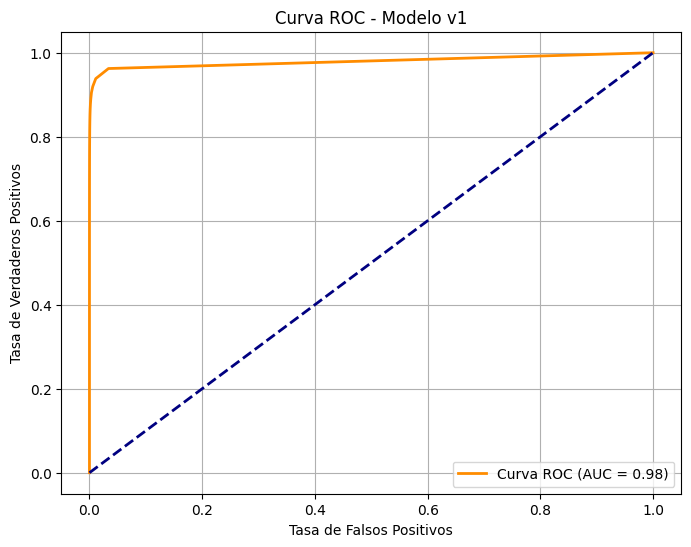

In [ ]:
# Obtener probabilidades de clase positiva (fraude = 1)
y_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Calcular valores para curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Modelo v1")
plt.legend(loc="lower right")
plt.grid()
plt.show()

La curva ROC obtenida presenta una forma muy cercana al vértice superior izquierdo, lo cual es una señal fuerte de buen rendimiento general del modelo. El valor de AUC = 0.98 indica que el modelo tiene una gran capacidad de distinguir entre transacciones fraudulentas y no fraudulentas cuando se consideran los umbrales de decisión como una variable.

Esto sugiere que el modelo sí contiene información útil para detectar fraudes, pero el umbral por defecto (0.5) no está optimizado para maximizar la detección de la clase minoritaria (fraude). Es por esto que, a pesar del AUC alto, el recall bajo en la clase 1 revela que muchos fraudes no están siendo correctamente identificados.

In [ ]:
# Obtener predicciones con el modelo v1
y_pred_v1 = random_forest_model.predict(X_test)

# Calcular la matriz de confusión
cm_v1 = confusion_matrix(y_test, y_pred_v1)

# Extraer los valores individuales
tn_v1, fp_v1, fn_v1, tp_v1 = cm_v1.ravel()

# Mostrar la matriz en español
print("=== Matriz de Confusión - Modelo v1 ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn_v1}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp_v1}")
print(f"Falsos Negativos (Fraude no detectado): {fn_v1}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp_v1}")

=== Matriz de Confusión - Modelo v1 ===
Verdaderos Negativos (No Fraude bien clasificado): 4871405
Falsos Positivos (No Fraude mal clasificado como Fraude): 11
Falsos Negativos (Fraude no detectado): 3486
Verdaderos Positivos (Fraude bien detectado): 2465


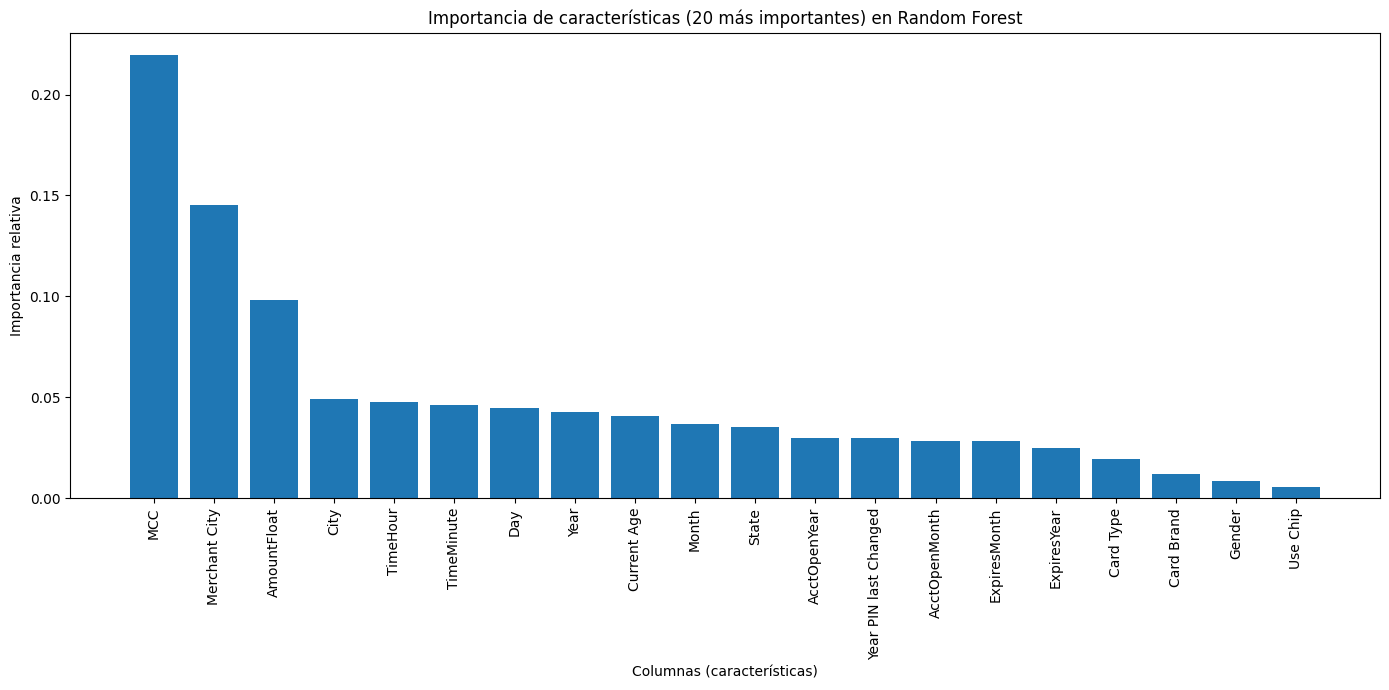

In [ ]:
# Obtener importancia de las características
importances = random_forest_model.feature_importances_

# Obtener nombres de columnas
feature_names = X_train.columns

# Ordenar por importancia
indices = np.argsort(importances)[::-1]

# Gráfica de barras con las 20 características más importantes
plt.figure(figsize=(14, 7))
plt.title("Importancia de características (20 más importantes) en Random Forest")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
plt.xlabel("Columnas (características)")
plt.ylabel("Importancia relativa")
plt.tight_layout()
plt.show()

In [ ]:
# Guardar el modelo Random Forest completo
joblib.dump(random_forest_model, 'random_forest_model_v2.pkl')

print("Modelo guardado como 'random_forest_model_v2.pkl'")

Modelo guardado como 'random_forest_model_v2.pkl'


/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/ricardomollinedo/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWa

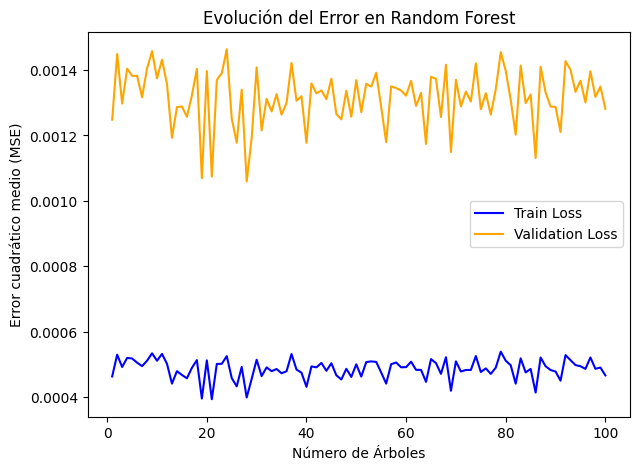

In [ ]:
# Registrar el error acumulado a medida que crecen los árboles
train_errors = []
test_errors = []
for i, tree in enumerate(random_forest_model.estimators_):  # Iterar sobre cada árbol individual
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Graficar
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(random_forest_model.estimators_) + 1), train_errors, label="Train Loss", color="blue")
plt.plot(range(1, len(random_forest_model.estimators_) + 1), test_errors, label="Validation Loss", color="orange")
plt.xlabel("Número de Árboles")
plt.ylabel("Error cuadrático medio (MSE)")
plt.legend()
plt.title("Evolución del Error en Random Forest")
plt.show()

In [ ]:
# Obtener predicciones
y_pred_rf = random_forest_model.predict(X_test)

# Calcular métricas individuales para cada clase
precision_rf = precision_score(y_test, y_pred_rf, average=None)
recall_rf = recall_score(y_test, y_pred_rf, average=None)
f1_rf = f1_score(y_test, y_pred_rf, average=None)

# Calcular estadísticas descriptivas
stats_rf = {
    "Precisión": precision_rf,
    "Sensibilidad": recall_rf,
    "F1 Score": f1_rf
}

df_rf = pd.DataFrame(stats_rf)

# Calcular estadísticas agregadas
summary_rf = {
    "Métrica": ["Media ponderada", "Media no ponderada", "Desviación típica", "P.25", "P.50 (Mediana)", "P.75"],
    "Precisión": [
        precision_score(y_test, y_pred_rf, average="weighted"),
        precision_score(y_test, y_pred_rf, average="macro"),
        df_rf["Precisión"].std(),
        np.percentile(df_rf["Precisión"], 25),
        np.median(df_rf["Precisión"]),
        np.percentile(df_rf["Precisión"], 75),
    ],
    "Sensibilidad": [
        recall_score(y_test, y_pred_rf, average="weighted"),
        recall_score(y_test, y_pred_rf, average="macro"),
        df_rf["Sensibilidad"].std(),
        np.percentile(df_rf["Sensibilidad"], 25),
        np.median(df_rf["Sensibilidad"]),
        np.percentile(df_rf["Sensibilidad"], 75),
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_rf, average="weighted"),
        f1_score(y_test, y_pred_rf, average="macro"),
        df_rf["F1 Score"].std(),
        np.percentile(df_rf["F1 Score"], 25),
        np.median(df_rf["F1 Score"]),
        np.percentile(df_rf["F1 Score"], 75),
    ]
}

df_summary_rf = pd.DataFrame(summary_rf)
print(df_summary_rf)

              Métrica  Precisión  Sensibilidad  F1 Score
0     Media ponderada   0.999280      0.999283  0.999135
1  Media no ponderada   0.997421      0.707107  0.792333
2   Desviación típica   0.002636      0.414210  0.293178
3                P.25   0.996489      0.560662  0.688679
4      P.50 (Mediana)   0.997421      0.707107  0.792333
5                P.75   0.998353      0.853552  0.895987


## OVERSAMPLING CON SMOTE

Ahora que tenemos Random Forest, aplicaremos SMOTE para aumentar la cantidad de datos marcados como fraudulentos

In [ ]:
################ EN CASO DE SOBRECARGA DE MEMORIA POR LOS DATOS, SOLO CARGAMOS LOS DAOTS

# Cargar el CSV con datos codificados
#df_encoded = pd.read_csv("ENCODED_transactions.csv")

# Separar características (X) y variable objetivo (y)
#X = df_encoded.drop(columns=["Is Fraud?"])
#y = df_encoded["Is Fraud?"]

# Separar entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y,
#    test_size=0.2,
#    random_state=42,
#    stratify=y   # Opcional, para mantener proporción de fraudes
#)

In [ ]:
print("\n=== Sobremuestreo (SMOTE) ===")
smote = smote = SMOTE(sampling_strategy=0.05, random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)


=== Sobremuestreo (SMOTE) ===


In [ ]:
# Entrenar con datos sobremuestreados
rf_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote_model.fit(X_train_over, y_train_over)

# Evaluar
y_pred_over = rf_smote_model.predict(X_test)
print("=== Classification Report (Oversampling) ===")
print(classification_report(y_test, y_pred_over))

=== Classification Report (Oversampling) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.88      0.63      0.74      5951

    accuracy                           1.00   4877367
   macro avg       0.94      0.82      0.87   4877367
weighted avg       1.00      1.00      1.00   4877367



Ahora buscamos el ROC CURVE

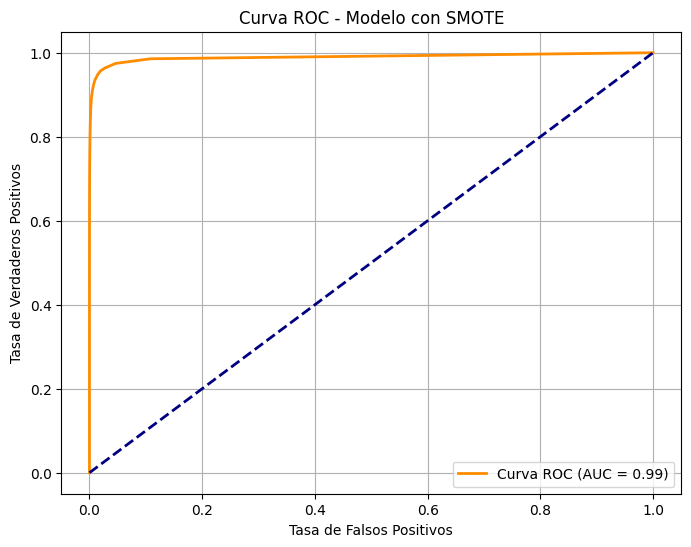

In [ ]:
# Obtener probabilidades de la clase positiva (fraude = 1)
y_proba_over = rf_smote_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr_over, tpr_over, thresholds_over = roc_curve(y_test, y_proba_over)
roc_auc_over = auc(fpr_over, tpr_over)

# Graficar la curva
plt.figure(figsize=(8,6))
plt.plot(fpr_over, tpr_over, color='darkorange', lw=2,
         label=f"Curva ROC (AUC = {roc_auc_over:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Modelo con SMOTE")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Después de aplicar SMOTE al modelo Random Forest, la curva ROC mostró un AUC de 0.99, lo que significa que el modelo ahora distingue mucho mejor entre transacciones normales y fraudulentas. Esta mejora también se nota en los resultados del reporte: el recall para la clase de fraude subió a 63%, mientras que la precisión fue de 88%. En comparación con la primera versión del modelo (que solo tenía 41% de recall para fraudes), esto es una mejora importante. Gracias al sobremuestreo, el modelo ya no se enfoca tanto en la clase mayoritaria y ahora está detectando más fraudes sin equivocarse demasiado. En resumen, SMOTE ayudó bastante a que el modelo sea más útil para el objetivo real, que es detectar fraudes de forma más efectiva.

In [ ]:
# 1. Obtener predicciones del modelo con SMOTE
y_pred_over = rf_smote_model.predict(X_test)

# Calcular la matriz de confusión
cm_over = confusion_matrix(y_test, y_pred_over)

# Extraer valores individuales
tn_over, fp_over, fn_over, tp_over = cm_over.ravel()

# Imprimir la matriz en español con explicación
print("=== Matriz de Confusión ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn_over}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp_over}")
print(f"Falsos Negativos (Fraude no detectado): {fn_over}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp_over}")

=== Matriz de Confusión ===
Verdaderos Negativos (No Fraude bien clasificado): 4870887
Falsos Positivos (No Fraude mal clasificado como Fraude): 529
Falsos Negativos (Fraude no detectado): 2179
Verdaderos Positivos (Fraude bien detectado): 3772


In [ ]:
# Guardar el modelo Random Forest completo
joblib.dump(rf_smote_model, 'random_forest_model_v3_oversampling.pkl')

print("Modelo guardado como 'random_forest_model_v3_oversampling.pkl'")


Modelo guardado como 'random_forest_model_v3_oversampling.pkl'


In [ ]:
########################### EN CASO DE SOBRECARGA DE MEMORIA POR LOS DATOS
# Cargar el modelo
#rf_smote_model = joblib.load("random_forest_model_v3_oversampling.pkl")

## GRAFICAMOS LAS COLUMNAS MAS IMPORTANTES

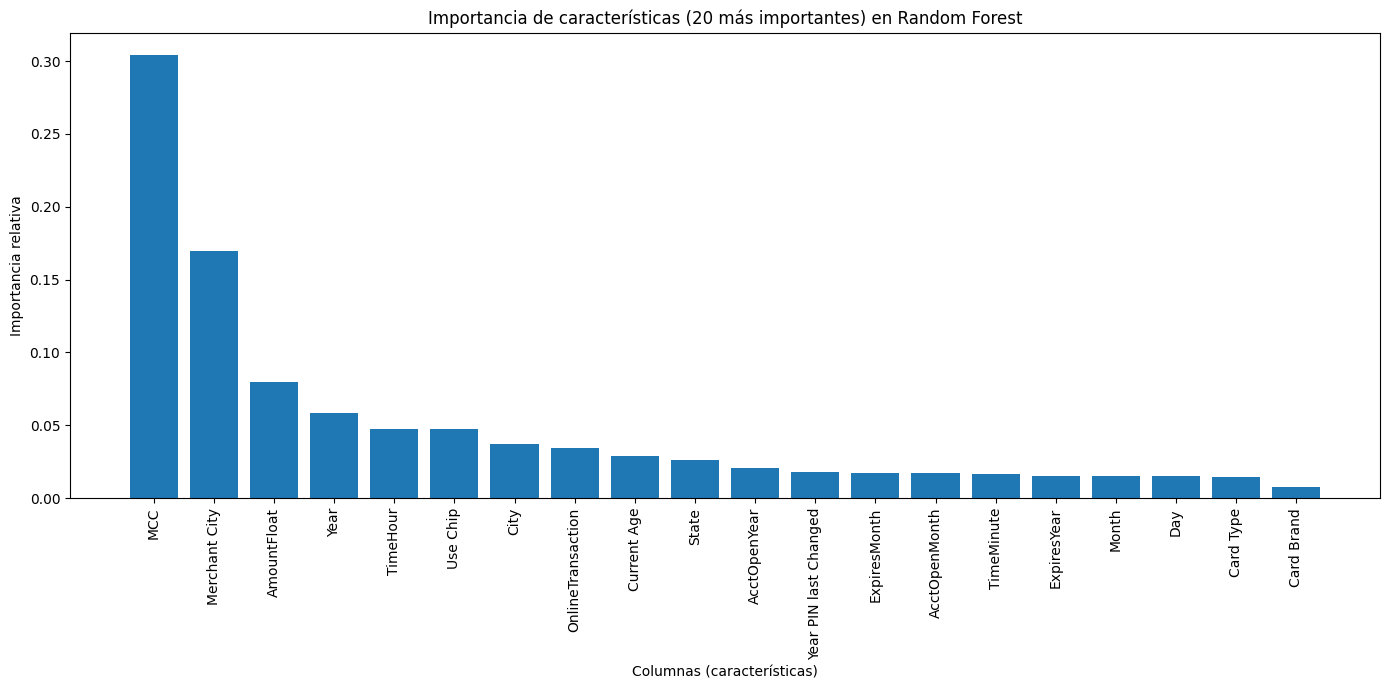

In [ ]:
# Obtener importancia de las características
importances = rf_smote_model.feature_importances_

# Obtener nombres de columnas
feature_names = X_train.columns

# Ordenar por importancia
indices = np.argsort(importances)[::-1]

# Gráfica de barras con las 20 características más importantes
plt.figure(figsize=(14, 7))
plt.title("Importancia de características (20 más importantes) en Random Forest")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
plt.xlabel("Columnas (características)")
plt.ylabel("Importancia relativa")
plt.tight_layout()
plt.show()


#### SMOTE CON 10

In [ ]:
print("\n=== Sobremuestreo (SMOTE) ===")
smote_v2 = smote_v2 = SMOTE(sampling_strategy=0.10, random_state=42)
X_train_over_v2, y_train_over_v2 = smote_v2.fit_resample(X_train, y_train)

# Entrenar con datos sobremuestreados
rf_smote_model_v2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote_model_v2.fit(X_train_over_v2, y_train_over_v2)

# Evaluar
y_pred_over = rf_smote_model_v2.predict(X_test)
print("=== Classification Report (Oversampling) ===")
print(classification_report(y_test, y_pred_over))



=== Sobremuestreo (SMOTE) ===
=== Classification Report (Oversampling) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.84      0.64      0.73      5951

    accuracy                           1.00   4877367
   macro avg       0.92      0.82      0.86   4877367
weighted avg       1.00      1.00      1.00   4877367



In [ ]:
# Guardar el modelo Random Forest completo
joblib.dump(rf_smote_model_v2, 'random_forest_model_v3_oversampling_v2_15.pkl')

print("Modelo guardado como 'random_forest_model_v3_oversampling_v2_15.pkl'")

Modelo guardado como 'random_forest_model_v3_oversampling_v2_15.pkl'


## USANDO GRIDSEARCH

In [ ]:



# Reducir el tamaño del dataset sobremuestreado
print(f"Tamaño original X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño sobremuestreado X_train_over: {X_train_over.shape}, y_train_over: {y_train_over.shape}")

X_train_sample, y_train_sample = resample(
    X_train_over, y_train_over,
    n_samples=min(int(len(y_train) * 1.2), 50000),  # Reducir tamaño
    random_state=42
)

print(f"Tamaño después de resample X_train_sample: {X_train_sample.shape}, y_train_sample: {y_train_sample.shape}")

# Liberar memoria antes de GridSearch
del X_train_over, y_train_over  # Eliminar datasets grandes si ya no se usan
gc.collect()  # Forzar liberación de memoria

Tamaño original X_train: (19509467, 22), y_train: (19509467,)
Tamaño sobremuestreado X_train_over: (20459944, 22), y_train_over: (20459944,)
Tamaño después de resample X_train_sample: (50000, 22), y_train_sample: (50000,)


3427

In [ ]:
rf_params_gs = RandomForestClassifier()
gs_params_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_params_gs, gs_params_space, cv = 3, scoring='roc_auc', verbose = 3)
rf_model_grid = grid_search.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=50;, score=0.926 total time=   0.8s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=50;, score=0.933 total time=   1.2s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=50;, score=0.936 total time=   1.2s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.930 total time=   2.1s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.929 total time=   1.7s
[CV 3/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=100;, score=0.937 total time=   2.1s
[CV 1/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.930 total time=   3.4s
[CV 2/3] END max_depth=3, max_features=10, min_samples_leaf=1, n_estimators=200;, score=0.930 total time=   3.4s
[CV 3/3] END max_depth=3, max_featur

In [ ]:
# Obtener el mejor modelo tras el GridSearch
rf_model_smote_gr = grid_search.best_estimator_

# Guardar el modelo con joblib
joblib.dump(rf_model_smote_gr, "random_forest_gridsearch.pkl")

print("Modelo guardado como 'random_forest_gridsearch.pkl'")

Modelo guardado como 'random_forest_gridsearch.pkl'


In [ ]:
# Hacer predicciones sobre el conjunto de prueba original (no balanceado)
y_pred_smote_gr = rf_model_smote_gr.predict(X_test)

# Mostrar el classification report
print("=== Evaluación del Mejor Modelo (GridSearchCV + SMOTE) ===")
print(classification_report(y_test, y_pred_best))

=== Evaluación del Mejor Modelo (GridSearchCV + SMOTE) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4871416
           1       0.25      0.64      0.35      5951

    accuracy                           1.00   4877367
   macro avg       0.62      0.82      0.68   4877367
weighted avg       1.00      1.00      1.00   4877367



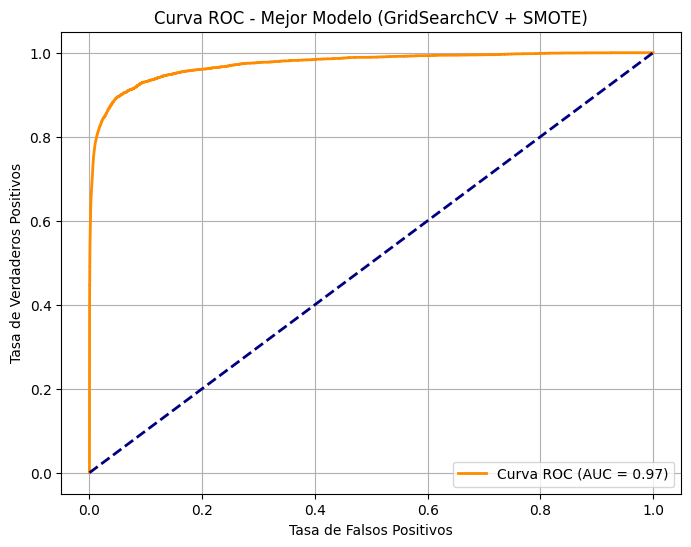

In [ ]:
# Obtener probabilidades de clase positiva (fraude = 1)
y_proba_smote_gr = rf_model_smote_gr.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr_smote_gr, tpr_smote_gr, thresholds_smote_gr = roc_curve(y_test, y_proba_smote_gr)
roc_auc_smote_gr = auc(fpr_smote_gr, tpr_smote_gr)

# Graficar la curva
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote_gr, tpr_smote_gr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_smote_gr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Mejor Modelo (GridSearchCV + SMOTE)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Matriz de confusión
cm_smote_gr = confusion_matrix(y_test, y_pred_smote_gr)

# Extraer valores
tn_smote_gr, fp_smote_gr, fn_smote_gr, tp_smote_gr = cm_smote_gr.ravel()

# Mostrar la matriz con etiquetas en español
print("=== Matriz de Confusión ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn_smote_gr}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp_smote_gr}")
print(f"Falsos Negativos (Fraude no detectado): {fn_smote_gr}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp_smote_gr}")

=== Matriz de Confusión ===
Verdaderos Negativos (No Fraude bien clasificado): 4859848
Falsos Positivos (No Fraude mal clasificado como Fraude): 11568
Falsos Negativos (Fraude no detectado): 2172
Verdaderos Positivos (Fraude bien detectado): 3779


## XGBOOST

### Encoding de los datos para XGBoost

In [ ]:
# Cargar el CSV con datos limpios
cleaned_df_boost = pd.read_csv("CLEANED_FINAL_MERGED_TRANSACTIONS.csv",sep=";")
# Listas de columnas que SÍ se usaran
numeric_cols_boost = [
    "Current Age",
    "ExpiresMonth",
    "ExpiresYear",
    "AcctOpenMonth",
    "AcctOpenYear",
    "Year PIN last Changed",
    "Year",
    "Month",
    "Day",
    "TimeHour",
    "TimeMinute",
    "AmountFloat",
    "MCC"
]

# Columnas categoricas que SI se usaran
categorical_cols_boost = [
    "Gender",
    "City",
    "State",
    "Card Brand",
    "Card Type",
    "Has Chip",
    "Use Chip",
    "Merchant City",
    "OnlineTransaction"
]

# Construimos un nuevo DataFrame con SOLO las columnas de interés + la target
all_feature_cols_boost = numeric_cols_boost + categorical_cols_boost + ["Is Fraud?"]


In [ ]:
df_model_for_xg = cleaned_df_boost[all_feature_cols_boost].copy()

# Convertir la variable objetivo "Is Fraud?" a 0/1
df_model_for_xg["Is Fraud?"] = df_model_for_xg["Is Fraud?"].map({"No":0, "Yes":1})

# Separar X (features) e y (target)
X_boost = df_model_for_xg.drop(columns=["Is Fraud?"])
y_boost = df_model_for_xg["Is Fraud?"]

numeric_features_boost = X_boost.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_boost = X_boost.select_dtypes(exclude=[np.number]).columns.tolist()

for col_cat in categorical_features_boost:
   X_boost[col_cat] = X_boost[col_cat].astype('category')

In [ ]:
# Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_boost, y_boost, test_size=0.2, random_state=42, stratify=y_boost)

# Convertir las características categóricas a formato compatible con XGBoost
# XGBoost maneja las columnas categóricas de Pandas si se les asigna tipo 'category'
for col in categorical_features_boost:
    X_train_boost[col] = X_train_boost[col].astype('category')
    X_test_boost[col] = X_test_boost[col].astype('category')

In [ ]:
# Convertir datos a DMatrix
dtrain = xgb.DMatrix(X_train_boost, label=y_train_boost, enable_categorical=True)
dtest = xgb.DMatrix(X_test_boost, label=y_test_boost, enable_categorical=True)  # Para evaluación opcional


In [ ]:
# Definir parámetros del modelo
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "hist",
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}

# Entrenar el modelo con la API de bajo nivel
model_boost = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=[(dtrain, "train"), (dtest, "test")],
    early_stopping_rounds=20  # Detiene el entrenamiento si no mejora en 20 iteraciones
)

[0]	train-logloss:0.11682	test-logloss:0.11682
[1]	train-logloss:0.10532	test-logloss:0.10531
[2]	train-logloss:0.09498	test-logloss:0.09497
[3]	train-logloss:0.08581	test-logloss:0.08581
[4]	train-logloss:0.07762	test-logloss:0.07762
[5]	train-logloss:0.07022	test-logloss:0.07021
[6]	train-logloss:0.06360	test-logloss:0.06360
[7]	train-logloss:0.05764	test-logloss:0.05763
[8]	train-logloss:0.05232	test-logloss:0.05232
[9]	train-logloss:0.04749	test-logloss:0.04749
[10]	train-logloss:0.04319	test-logloss:0.04319
[11]	train-logloss:0.03928	test-logloss:0.03928
[12]	train-logloss:0.03578	test-logloss:0.03578
[13]	train-logloss:0.03256	test-logloss:0.03256
[14]	train-logloss:0.02973	test-logloss:0.02974
[15]	train-logloss:0.02713	test-logloss:0.02713
[16]	train-logloss:0.02480	test-logloss:0.02482
[17]	train-logloss:0.02273	test-logloss:0.02275
[18]	train-logloss:0.02084	test-logloss:0.02087
[19]	train-logloss:0.01912	test-logloss:0.01914
[20]	train-logloss:0.01756	test-logloss:0.01758
[2

In [ ]:
# Hacer predicciones
y_pred_proba = model_boost.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convertir probabilidades en clases binarias

# Evaluar el modelo
accuracy = accuracy_score(y_test_boost, y_pred)
precision = precision_score(y_test_boost, y_pred)
recall = recall_score(y_test_boost, y_pred)
f1 = f1_score(y_test_boost, y_pred)
roc_auc = roc_auc_score(y_test_boost, y_pred_proba)

# Imprimir métricas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Accuracy: 0.9995
Precision: 0.9768
Recall: 0.6078
F1-score: 0.7493
ROC-AUC: 0.9938


In [ ]:
# Hacer predicciones de probabilidad
y_pred_proba_boost = model_boost.predict(dtest)

# Convertir probabilidades en clases binarias (umbral 0.5)
y_pred_boost = (y_pred_proba_boost > 0.5).astype(int)

# Generar el classification report
report_xgb = classification_report(y_test_boost, y_pred_boost, target_names=["No Fraude", "Fraude"])

# Imprimir el reporte
print("=== XGBoost Classification Report ===")
print(report_xgb)



=== XGBoost Classification Report ===
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00   4871416
      Fraude       0.98      0.61      0.75      5951

    accuracy                           1.00   4877367
   macro avg       0.99      0.80      0.87   4877367
weighted avg       1.00      1.00      1.00   4877367



In [ ]:

# Guardar el modelo entrenado
joblib.dump(model_boost, "modelo_xgboost.joblib")

['modelo_xgboost.joblib']

In [ ]:
####################### DESCOMENTAR EN CASO DE SOBRECARGA DE MEMORIA

# Cargar el modelo previamente guardado
#model_boost = joblib.load("modelo_xgboost.joblib")

In [ ]:
# Asegúrate de que X_test_boost esté convertido a DMatrix
dtest = xgb.DMatrix(X_test_boost, enable_categorical=True)

# Obtener predicciones (ya son probabilidades si el objetivo es binario)
y_pred_proba_xg_v1 = model_boost.predict(dtest)  # Da probabilidades directamente

# Para matriz de confusión, binariza las probabilidades
y_pred_xg_v1 = (y_pred_proba_xg_v1 >= 0.5).astype(int)

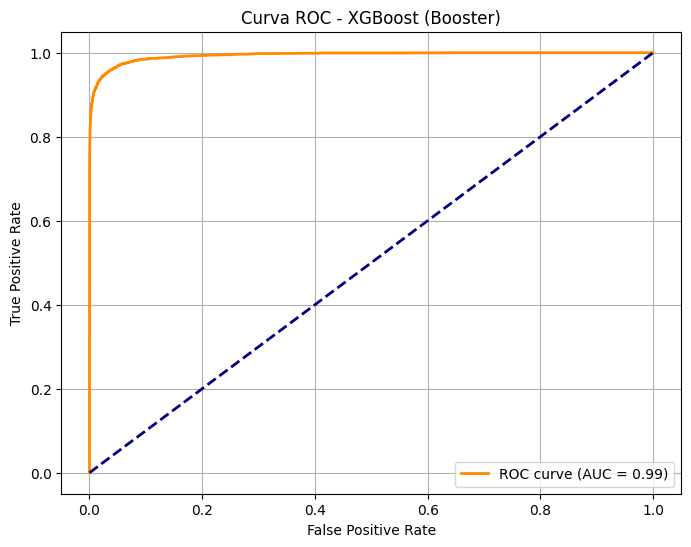

In [ ]:
# Calcular puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_boost, y_pred_proba_xg_v1)
roc_auc = auc(fpr, tpr)

# Graficar la curva
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - XGBoost (Booster)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# Obtener la matriz de confusión
cm_boost = confusion_matrix(y_test_boost, y_pred_xg_v1)

# Extraer los valores
tn_boost, fp_boost, fn_boost, tp_boost = cm_boost.ravel()

# Mostrar los valores con etiquetas descriptivas
print("=== Matriz de Confusión - XGBoost (Booster) ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn_boost}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp_boost}")
print(f"Falsos Negativos (Fraude no detectado): {fn_boost}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp_boost}")



=== Matriz de Confusión - XGBoost (Booster) ===
Verdaderos Negativos (No Fraude bien clasificado): 4871330
Falsos Positivos (No Fraude mal clasificado como Fraude): 86
Falsos Negativos (Fraude no detectado): 2334
Verdaderos Positivos (Fraude bien detectado): 3617


## XGBOOST V2

In [ ]:
params_v2_boost = {
    "objective": "binary:logistic",
    "eval_metric": "aucpr",  # Evalúa mejor en datasets desbalanceados
    "tree_method": "hist",
    "learning_rate": 0.05,  # Aprendizaje más lento para mejorar recall
    "max_depth": 4,  # Reduce overfitting
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "scale_pos_weight": 10  # Ajusta el peso de la clase minoritaria
}

# Entrenar el modelo con la API de bajo nivel
model_boost_v2 = xgb.train(
    params_v2_boost,
    dtrain,
    num_boost_round=400,
    evals=[(dtrain, "train"), (dtest, "test")]
)

[0]	train-aucpr:0.35061	test-aucpr:0.34647
[1]	train-aucpr:0.39763	test-aucpr:0.39426
[2]	train-aucpr:0.40204	test-aucpr:0.39641
[3]	train-aucpr:0.43509	test-aucpr:0.42799
[4]	train-aucpr:0.42465	test-aucpr:0.41893
[5]	train-aucpr:0.42707	test-aucpr:0.42094
[6]	train-aucpr:0.43872	test-aucpr:0.43309
[7]	train-aucpr:0.46378	test-aucpr:0.45997
[8]	train-aucpr:0.48526	test-aucpr:0.48282
[9]	train-aucpr:0.48122	test-aucpr:0.47758
[10]	train-aucpr:0.48976	test-aucpr:0.48768
[11]	train-aucpr:0.48847	test-aucpr:0.48607
[12]	train-aucpr:0.48485	test-aucpr:0.48122
[13]	train-aucpr:0.49452	test-aucpr:0.49009
[14]	train-aucpr:0.50411	test-aucpr:0.49913
[15]	train-aucpr:0.51930	test-aucpr:0.51275
[16]	train-aucpr:0.53384	test-aucpr:0.52752
[17]	train-aucpr:0.54039	test-aucpr:0.53203
[18]	train-aucpr:0.54416	test-aucpr:0.53333
[19]	train-aucpr:0.55479	test-aucpr:0.54329
[20]	train-aucpr:0.55760	test-aucpr:0.54623
[21]	train-aucpr:0.57062	test-aucpr:0.55888
[22]	train-aucpr:0.56968	test-aucpr:0.5578

In [ ]:
# Hacer predicciones de probabilidad
y_pred_proba_boost_v2 = model_boost_v2.predict(dtest)

# Convertir probabilidades en clases binarias (umbral 0.5)
y_pred_boost_v2 = (y_pred_proba_boost_v2 > 0.5).astype(int)

# Generar el classification report
report_xgb_v2 = classification_report(y_test_boost, y_pred_boost_v2, target_names=["No Fraude", "Fraude"])

# Imprimir el reporte
print("=== XGBoost Classification Report ===")
print(report_xgb_v2)

=== XGBoost Classification Report ===
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00   4871416
      Fraude       0.70      0.64      0.67      5951

    accuracy                           1.00   4877367
   macro avg       0.85      0.82      0.83   4877367
weighted avg       1.00      1.00      1.00   4877367



In [ ]:
####################### DESCOMENTAR EN CASO DE SOBRECARGA DE MEMORIA

# Si lo cargas desde el archivo
#model_boost_v2 = joblib.load("modelo_xgboost_v2.joblib")

In [ ]:
# Asegúrate de que X_test_boost está convertido a DMatrix
dtest = xgb.DMatrix(X_test_boost, enable_categorical=True)

# Probabilidades (entre 0 y 1)
y_pred_proba_v2 = model_boost_v2.predict(dtest)

# Clases binarizadas con umbral 0.5
y_pred_v2 = (y_pred_proba_v2 >= 0.5).astype(int)


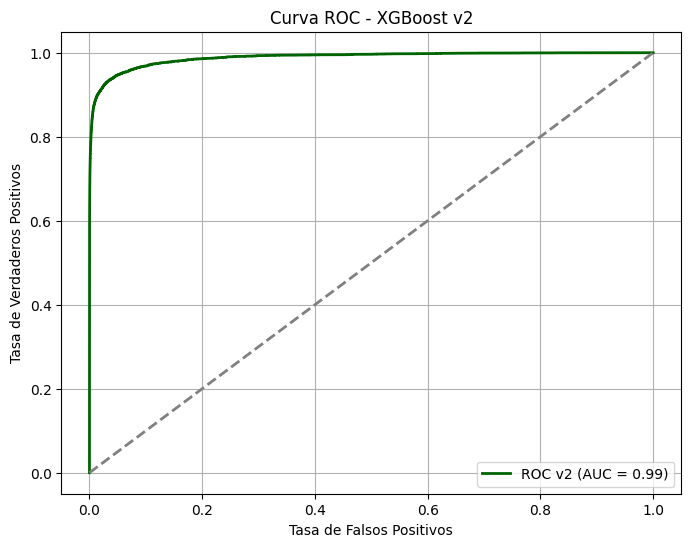

In [ ]:
# Calcular la curva ROC
fpr_xg_v2, tpr_xg_v2, thresholds_xg_v2 = roc_curve(y_test_boost, y_pred_proba_v2)
roc_auc_xg_v2 = auc(fpr_xg_v2, tpr_xg_v2)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr_xg_v2, tpr_xg_v2, color='darkgreen', lw=2, label=f"ROC v2 (AUC = {roc_auc_xg_v2:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - XGBoost v2")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# Matriz de confusión
cm_xg_v2 = confusion_matrix(y_test_boost, y_pred_v2)

# Extraer valores
tn_xg_v2, fp_xg_v2, fn_xg_v2, tp_xg_v2 = cm_xg_v2.ravel()

# Mostrar etiquetas en español
print("=== Matriz de Confusión - XGBoost v2 ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn_xg_v2}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp_xg_v2}")
print(f"Falsos Negativos (Fraude no detectado): {fn_xg_v2}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp_xg_v2}")

=== Matriz de Confusión - XGBoost v2 ===
Verdaderos Negativos (No Fraude bien clasificado): 4869825
Falsos Positivos (No Fraude mal clasificado como Fraude): 1591
Falsos Negativos (Fraude no detectado): 2163
Verdaderos Positivos (Fraude bien detectado): 3788


In [ ]:
# Guardar el modelo entrenado
joblib.dump(model_boost_v2, "modelo_xgboost_v2.joblib")

['modelo_xgboost_v2.joblib']

## XGBOOST CROSS VALIDATION

In [ ]:
# Definir los hiperparámetros iniciales
params_cv = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "hist",  # Usa 'gpu_hist' si tienes GPU
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}

# Configurar la validación cruzada estratificada
cv_xgboost_results = xgb.cv(
    params=params_cv,
    dtrain=dtrain,
    num_boost_round=400,  # Número máximo de iteraciones
    nfold=5,  # Número de folds para validación cruzada
    early_stopping_rounds=20,  # Detener si no mejora en 20 iteraciones
    metrics="logloss",
    as_pandas=True,
    seed=42
)

# Mostrar los resultados de la validación cruzada
print(cv_xgboost_results)

     train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.116823           0.000013           0.116824   
1              0.105322           0.000013           0.105323   
2              0.094984           0.000013           0.094988   
3              0.085814           0.000012           0.085820   
4              0.077626           0.000012           0.077634   
..                  ...                ...                ...   
395            0.001430           0.000019           0.001970   
396            0.001429           0.000020           0.001969   
397            0.001428           0.000019           0.001968   
398            0.001425           0.000019           0.001966   
399            0.001424           0.000019           0.001965   

     test-logloss-std  
0            0.000038  
1            0.000040  
2            0.000038  
3            0.000039  
4            0.000039  
..                ...  
395          0.000052  
396          0.000052  
397

In [ ]:
best_trees = cv_xgboost_results.shape[0]
evals_result = {}
# Entrenar con el número óptimo de árboles
final_xgboost_model_cv = xgb.train(
    params=params_cv,
    dtrain=dtrain,
    num_boost_round=best_trees,
    evals=[(dtrain, "train"), (dtest, "test")],
    early_stopping_rounds=20,
    evals_result=evals_result
)

[0]	train-logloss:0.11682	test-logloss:0.11682
[1]	train-logloss:0.10532	test-logloss:0.10531
[2]	train-logloss:0.09498	test-logloss:0.09497
[3]	train-logloss:0.08581	test-logloss:0.08581
[4]	train-logloss:0.07762	test-logloss:0.07762
[5]	train-logloss:0.07022	test-logloss:0.07021
[6]	train-logloss:0.06360	test-logloss:0.06360
[7]	train-logloss:0.05764	test-logloss:0.05763
[8]	train-logloss:0.05232	test-logloss:0.05232
[9]	train-logloss:0.04749	test-logloss:0.04749
[10]	train-logloss:0.04319	test-logloss:0.04319
[11]	train-logloss:0.03928	test-logloss:0.03928
[12]	train-logloss:0.03578	test-logloss:0.03578
[13]	train-logloss:0.03256	test-logloss:0.03256
[14]	train-logloss:0.02973	test-logloss:0.02974
[15]	train-logloss:0.02713	test-logloss:0.02713
[16]	train-logloss:0.02480	test-logloss:0.02482
[17]	train-logloss:0.02273	test-logloss:0.02275
[18]	train-logloss:0.02084	test-logloss:0.02087
[19]	train-logloss:0.01912	test-logloss:0.01914
[20]	train-logloss:0.01756	test-logloss:0.01758
[2

In [ ]:
####################### DESCOMENTAR EN CASO DE SOBRECARGA DE MEMORIA

# Si lo cargas desde el archivo
#final_xgboost_model_cv = joblib.load("XGBOOST_CV.pkl")

In [ ]:
# Obtener predicciones de probabilidad en el Test set
test_preds_proba_v3 = final_xgboost_model_cv.predict(dtest)

# Convertir probabilidades en clases binarias (umbral 0.5)
test_preds_v3 = (test_preds_proba_v3 > 0.5).astype(int)

# Generar Classification Report
report_xgb_cv = classification_report(y_test_boost, test_preds_v3, target_names=["No Fraude", "Fraude"])

# Imprimir el reporte
print("=== XGBoost Cross Validation Classification Report ===")
print(report_xgb_cv)

=== XGBoost Cross Validation Classification Report ===
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00   4871416
      Fraude       0.97      0.64      0.78      5951

    accuracy                           1.00   4877367
   macro avg       0.99      0.82      0.89   4877367
weighted avg       1.00      1.00      1.00   4877367



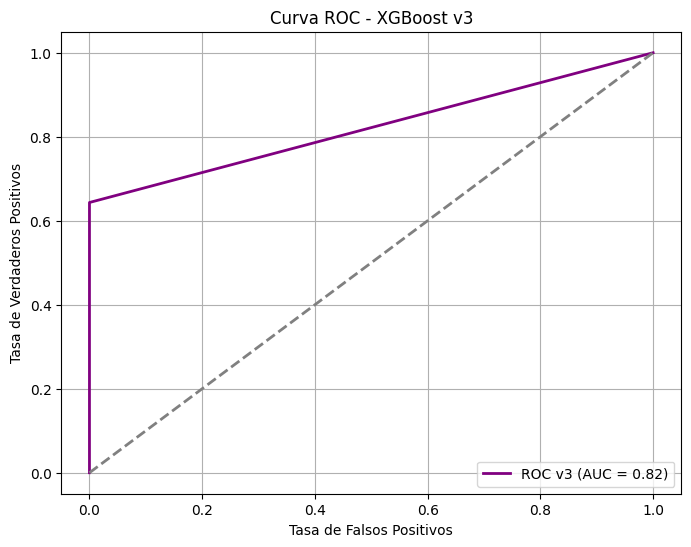

In [ ]:
# Calcular curva ROC
fpr_xg_v3, tpr_xg_v3, thresholds_xg_v3 = roc_curve(y_test_boost, test_preds_v3)
roc_auc_xg_v3 = auc(fpr_xg_v3, tpr_xg_v3)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xg_v3, tpr_xg_v3, color='purple', lw=2, label=f"ROC v3 (AUC = {roc_auc_xg_v3:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - XGBoost v3")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# Matriz de confusión
cm_xg_v3 = confusion_matrix(y_test_boost, test_preds_v3)

# Extraer valores
tn_xg_v3, fp_xg_v3, fn_xg_v3, tp_xg_v3 = cm_xg_v3.ravel()

# Mostrar resultados descriptivos
print("=== Matriz de Confusión - XGBoost v3 ===")
print(f"Verdaderos Negativos (No Fraude bien clasificado): {tn_xg_v3}")
print(f"Falsos Positivos (No Fraude mal clasificado como Fraude): {fp_xg_v3}")
print(f"Falsos Negativos (Fraude no detectado): {fn_xg_v3}")
print(f"Verdaderos Positivos (Fraude bien detectado): {tp_xg_v3}")


=== Matriz de Confusión - XGBoost v3 ===
Verdaderos Negativos (No Fraude bien clasificado): 4871315
Falsos Positivos (No Fraude mal clasificado como Fraude): 101
Falsos Negativos (Fraude no detectado): 2122
Verdaderos Positivos (Fraude bien detectado): 3829


In [ ]:
# Guardar el modelo Random Forest completo
joblib.dump(final_xgboost_model_cv, 'XGBOOST_CV.pkl')

print("Modelo guardado como 'XGBOOST_CV.pkl'")

Modelo guardado como 'XGBOOST_CV.pkl'


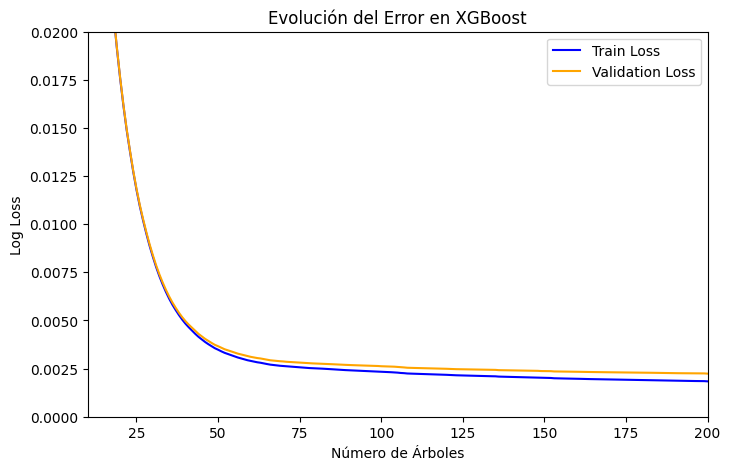

In [ ]:
# Extraer pérdidas de entrenamiento y validación SIN reentrenar
train_loss = evals_result["train"]["logloss"]
val_loss = evals_result["test"]["logloss"]

# Graficar la evolución del error en XGBoost
plt.figure(figsize=(8,5))
plt.plot(cv_xgboost_results["train-logloss-mean"], label="Train Loss", color="blue")
plt.plot(cv_xgboost_results["test-logloss-mean"], label="Validation Loss", color="orange")

plt.xlabel("Número de Árboles")
plt.ylabel("Log Loss")
plt.title("Evolución del Error en XGBoost")

# Ajustar el zoom para mejor comparación
plt.xlim(10, 200)  # Limitar el eje X para evitar la parte donde cae rápido
plt.ylim(0, 0.02)  # Limitar el eje Y para enfocarse en la parte baja del error

plt.legend()
plt.show()

Ahora obtenemos las columnas mas importantes

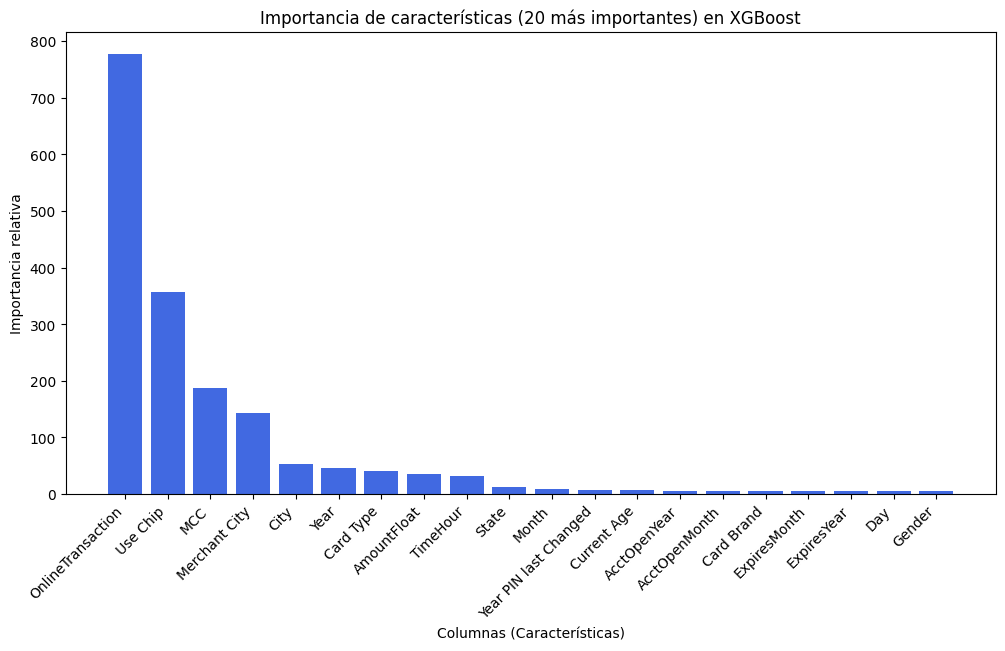

In [ ]:
# Obtener la importancia de características usando 'gain' (puedes cambiar a 'weight' o 'cover')
feature_importance = final_xgboost_model_cv.get_score(importance_type="gain")

# Convertir a DataFrame para ordenarlo y visualizarlo
importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)  # Tomar solo las 20 más importantes

# Graficar la importancia de características
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='royalblue')
plt.xlabel('Columnas (Características)')
plt.ylabel('Importancia relativa')
plt.title('Importancia de características (20 más importantes) en XGBoost')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.show()